In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
#question 1 
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
store1 = np.array([350, 460, 20, 160, 580, 250, 210, 100, 200, 510, 290, 380])
store2 = np.array([520, 180, 260, 380, 80, 500, 630, 420, 210, 70, 440, 140])

df = pd.DataFrame({
    "Month" : months,
    "Store1" : store1,
    "Store2" : store2
})
df

,Month,Store1,Store2
0,Jan,350,520
1,Feb,460,180
2,Mar,20,260
3,Apr,160,380
4,May,580,80
5,Jun,250,500
6,Jul,210,630
7,Aug,100,420
8,Sep,200,210
9,Oct,510,70


In [3]:
#Numerical Analysis
df.describe()

,Store1,Store2
count,12.000000,12.000000
mean,292.500000,319.166667
std,169.229538,186.910690
min,20.000000,70.000000
25%,190.000000,170.000000
50%,270.000000,320.000000
75%,400.000000,455.000000
max,580.000000,630.000000


In [4]:
#numerical analysis
print("Total Yearly Sales:")
print("Store 1:",  df["Store1"].sum())
print("Store 2:", df["Store2"].sum())


Total Yearly Sales:
Store 1: 3510
Store 2: 3830


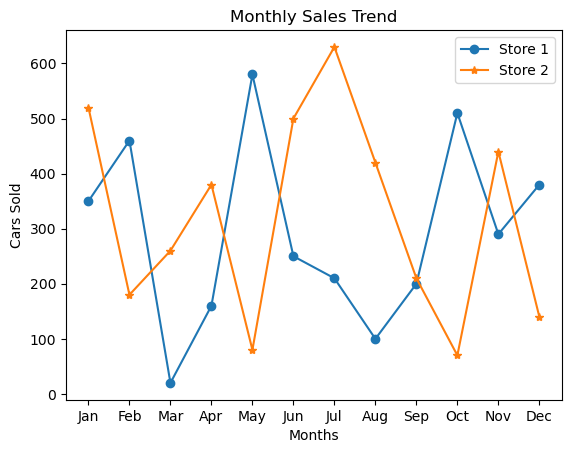

In [5]:
#line chart
plt.figure()
plt.plot(months, store1, marker='o', label='Store 1')
plt.plot(months, store2, marker='*', label='Store 2')

plt.xlabel("Months")
plt.ylabel("Cars Sold")
plt.title("Monthly Sales Trend")

plt.legend()
plt.show()

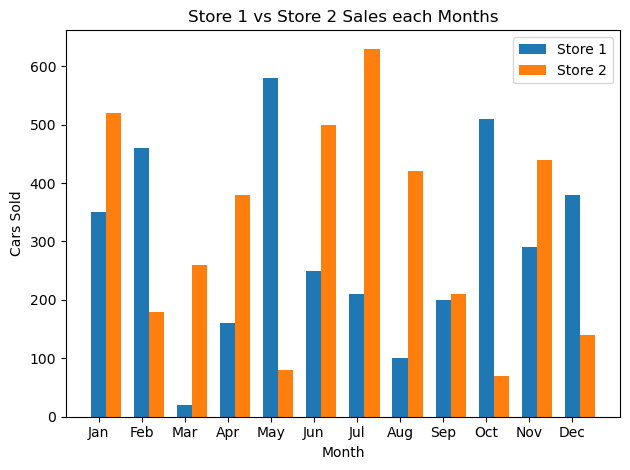

In [6]:
#bar chart
x = np.arange(len(months))
w=0.35

plt.bar(x,df["Store1"], w, label="Store 1")
plt.bar(x + w, df["Store2"], w, label="Store 2")

plt.xticks(x, months)
plt.xlabel("Month")

plt.ylabel("Cars Sold")
plt.title("Store 1 vs Store 2 Sales each Months")

plt.legend()
plt.tight_layout()
plt.show()

In [7]:
#===========================
#Question 2 Outliner Removal
#===========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
house = pd.read_csv("house_price.csv")
house.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


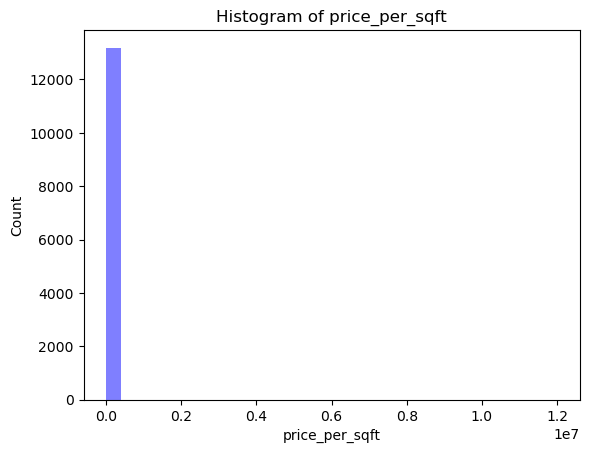

In [15]:
#1. Use histogram plot to visually inspect if outliers exist or not.
price_sqft = house["price_per_sqft"]

plt.hist(price_sqft, bins=30, facecolor='blue', alpha=0.5)
plt.xlabel("price_per_sqft")
plt.ylabel("Count")
plt.title("Histogram of price_per_sqft" )
plt.show()

In [99]:
#2. Show the range of price_per_sqft which covers the 95% and 99.7% of the area of data points
price_sqft = house["price_per_sqft"]

mean_value = price_sqft.mean()
std_value  = price_sqft.std(ddof=1)

range95_low  = mean_value - 2 * std_value
range95_high = mean_value + 2 * std_value

range997_low  = mean_value - 3 * std_value
range997_high = mean_value + 3 * std_value

print("95% range:", range95_low, "to", range95_high)
print("99.7% range:", range997_low, "to", range997_high)


95% range: -205533.98391379268 to 221374.65739864114
99.7% range: -312261.1442419011 to 328101.8177267496


In [100]:
#4. After removing outliers in step 1, what is the size of the new data frame
print("Original shape:", house.shape)
print("After IQR shape:", house_iqr.shape)

Original shape: (13200, 7)
After IQR shape: (11935, 7)


In [102]:
#3. Remove outliers using IQR technique. Your goal is to come up with new pandas dataframe
#that doesn't have the outliers (<lower threshold and > higher threshold) present in it. After
#removing outliers, show the new data frame.
Q1 = price_sqft.quantile(0.25)
Q3 = price_sqft.quantile(0.75)
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
uprice_sqfter_fence = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower fence:", lower_fence)
print("Upper fence:", upper_fence)

house_iqr = house[(price_sqft >= lower_fence) & (price_sqft <= upper_fence)].copy()
print("\nDataFrame after IQR outlier removal:")
print(house_iqr.head())


Q1: 4267.0
Q3: 7317.0
IQR: 3050.0
Lower fence: -308.0
Upper fence: 11892.0

DataFrame after IQR outlier removal:
                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  


In [104]:
#5. On step (2) data frame, use 3 standard deviation to remove outliers
mean_val = price_sqft.mean()
std_val  = price_sqft.std(ddof=1)

lower3std = mean_val - 3 * std_val
upper3std = mean_val + 3 * std_val

print("Lower bound (mean - 3*std):", lower3std)
print("Upper bound (mean + 3*std):", upper3std)

house_3std = house[(price_sqft >= lower3std) & (price_sqft <= upper3std)].copy()
print("\nDataFrame after 3-std (first 5 rows):")
print(house_3std.head())

print("\nOriginal shape:", house.shape)
print("After 3-std shape:", house_3std.shape)

Lower bound (mean - 3*std): -312261.1442419011
Upper bound (mean + 3*std): 328101.8177267496

DataFrame after 3-std (first 5 rows):
                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  

Original shape: (13200, 7)
After 3-std shape: (13195, 7)


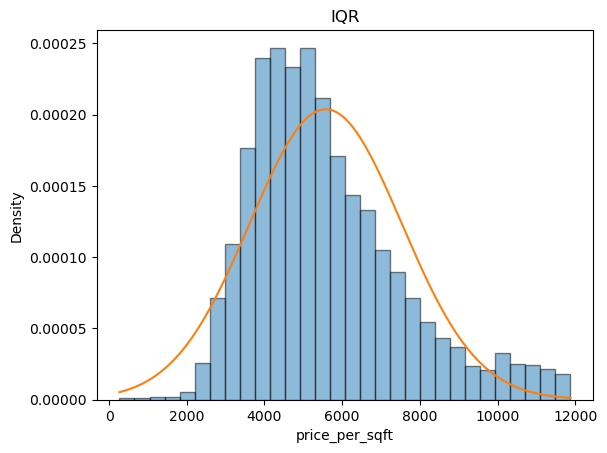

In [105]:
#7. Plot histogram for new data frame that is generated after step (3) and (5). Also plot bell curve on same
#histogram
data_iqr = house_iqr["price_per_sqft"]
mu_iqr = data_iqr.mean()
sd_iqr = data_iqr.std(ddof=1)

plt.hist(data_iqr, bins=30, density=True, edgecolor='black', alpha=0.5)

x = np.linspace(data_iqr.min(), data_iqr.max(), 200)

y = (1 / (sd_iqr * math.sqrt(2*math.pi))) * np.exp(-0.5 * ((x - mu_iqr)/sd_iqr)**2)

plt.plot(x, y)
plt.xlabel("price_per_sqft")
plt.ylabel("Density")
plt.title("IQR")
plt.show()



In [21]:
#8. On step (2) data frame, use zscore of 3 to remove outliers. This is quite similar to step (5) and you will
#get exactly same result
z = (price_sqft - mean_val) / std_val

house_z = house[abs(z) <= 3].copy()

print(house_z.head())
print("Shape after z-score filter:", house_z.shape)


                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  
Shape after z-score filter: (13195, 7)


In [68]:
#===========================
#Question 3- winequaliity-red.csv
#===========================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
win = pd.read_csv("winequality-red.csv")
win.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
#1. Check whether any missing or duplicate values exist in the dataset. Remove those if there is any.
print(" Missing Columns" , win.isna().sum())
print("\nNumber of duplicate rows:", win.duplicated().sum())
print("Shape" , win.shape)
print()

#first i cleaned the data set then i reset the index of them
print(" cleaning the dataset")
win_cleaned = win.drop_duplicates()
print(win_cleaned.shape)
win_cleaned.head().reset_index()

 Missing Columns fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Number of duplicate rows: 240
Shape (1599, 12)

 cleaning the dataset
(1359, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


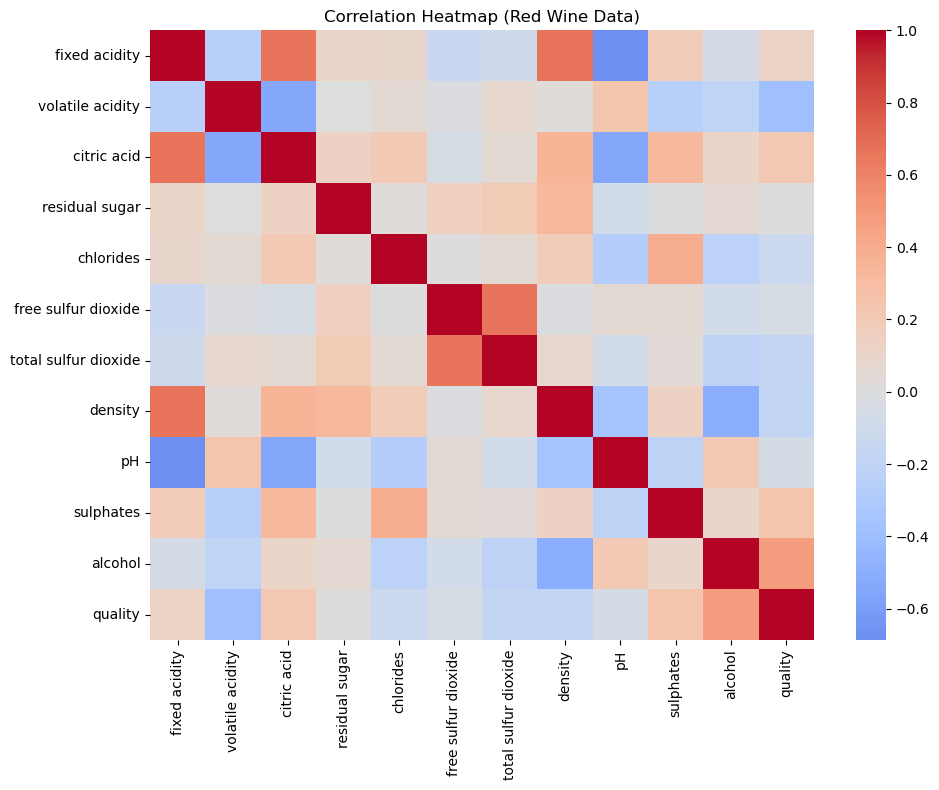

In [98]:
#2 Find the correlation information of all the variables and show it as a heatmap using seaborn library.
#What can you infer from it (e.g., variables which are highly correlated either positively or negatively). 
corr_Info = win_cleaned.corr()

plt.figure(figsize=(10,8))
sns.heatmap(
    corr_Info,
    cmap="coolwarm",  
    center=0
)
plt.title("Correlation Heatmap (Red Wine Data)")
plt.tight_layout()
plt.show()

Unique quality levels: [5 6 7 4 8 3]

Counts per quality:
quality
3     10
4     53
5    577
6    535
7    167
8     17
Name: count, dtype: int64


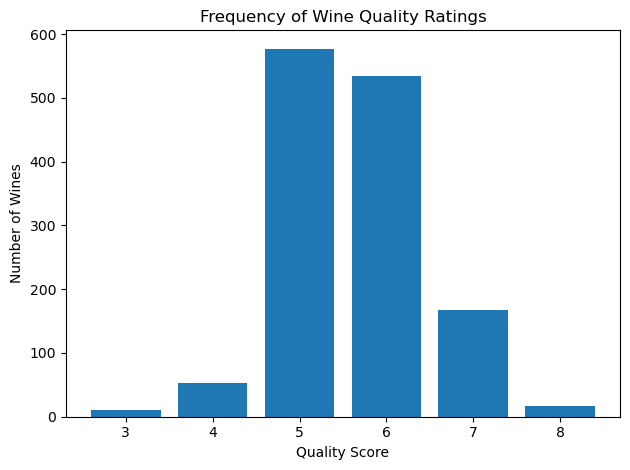

In [53]:
#3.Find how many unique Quality are there, count the frequency of each quality and show the result as a
#bar graph with appropriate labeling. 

unique_qualities = win_cleaned["quality"].unique()
print("Unique quality levels:", unique_qualities)

quality_counts = win_cleaned["quality"].value_counts().sort_index()

print("\nCounts per quality:")
print(quality_counts)

plt.bar(quality_counts.index, quality_counts.values)

plt.xlabel("Quality Score")
plt.ylabel("Number of Wines")
plt.title("Frequency of Wine Quality Ratings")
plt.tight_layout()
plt.show()

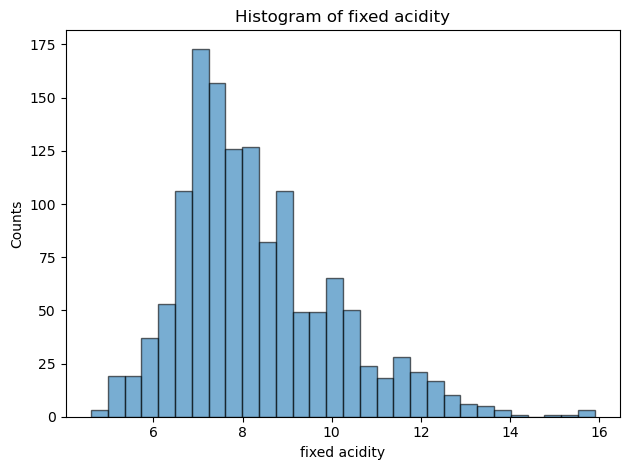

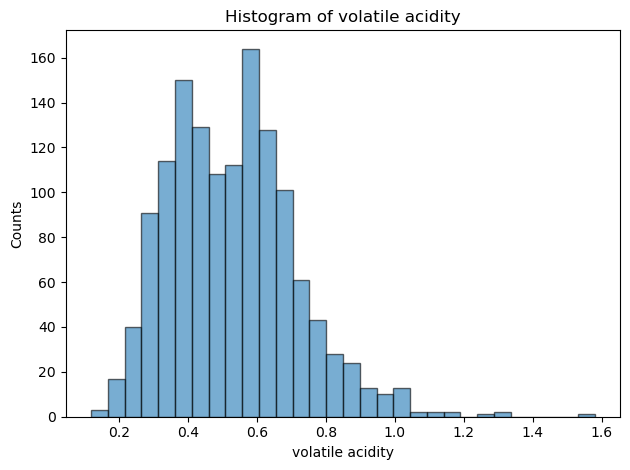

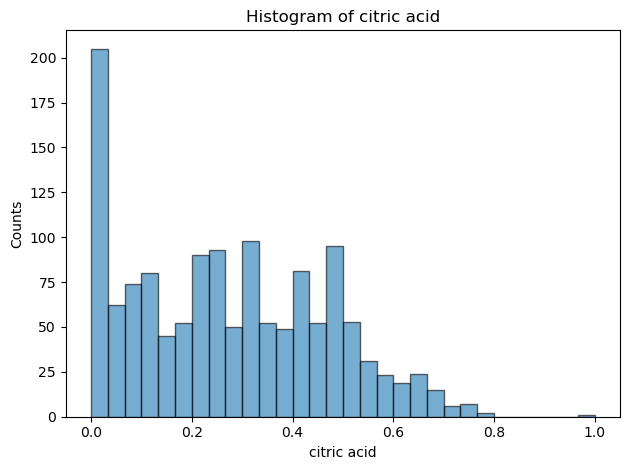

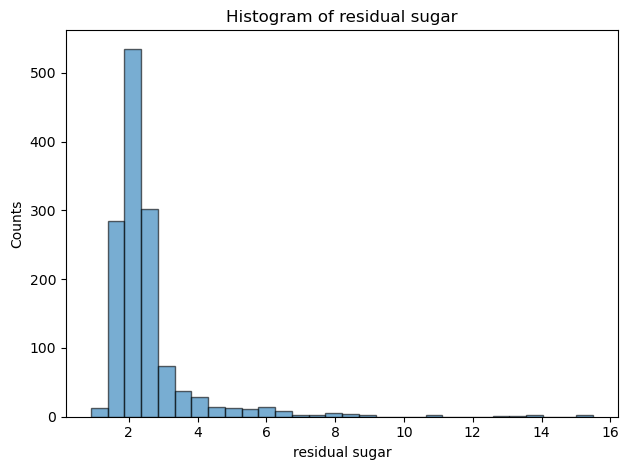

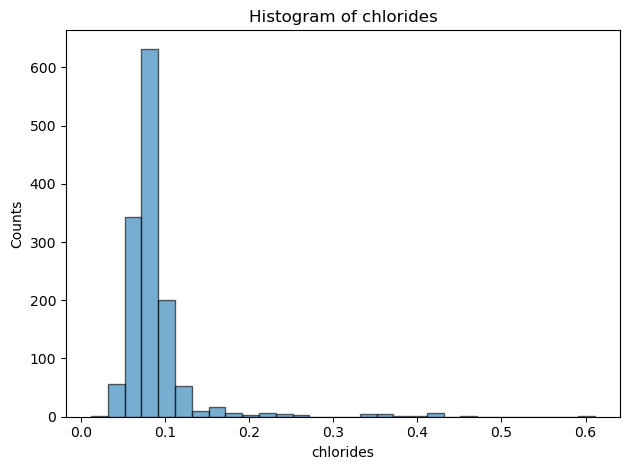

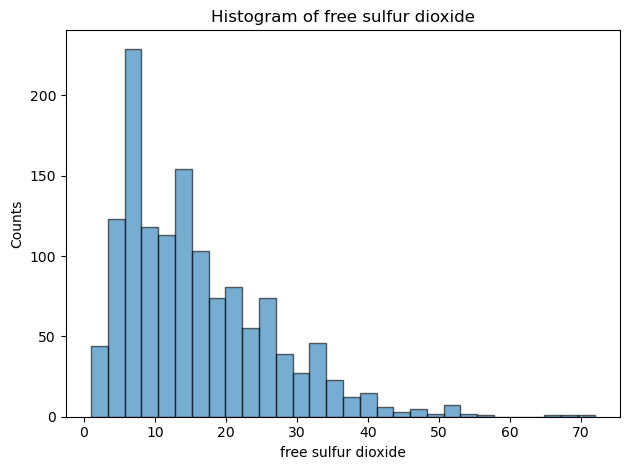

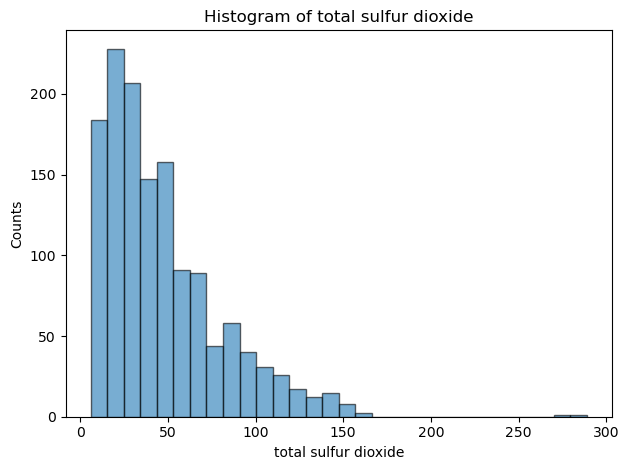

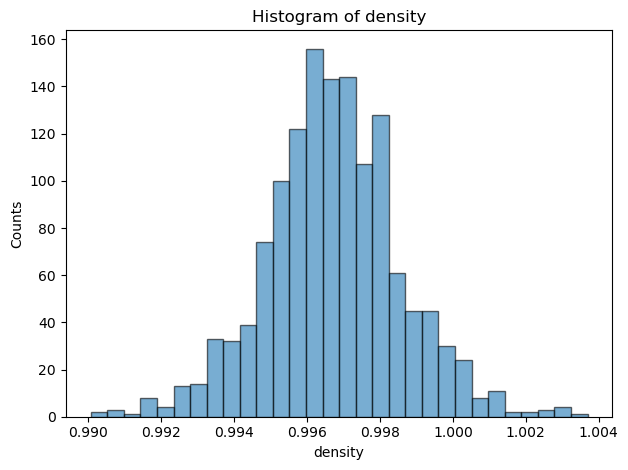

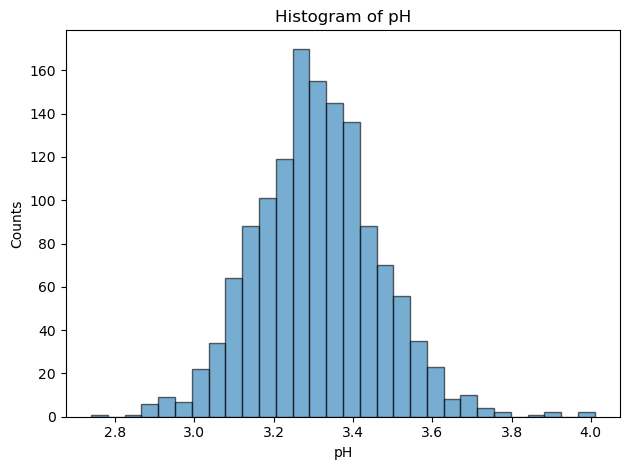

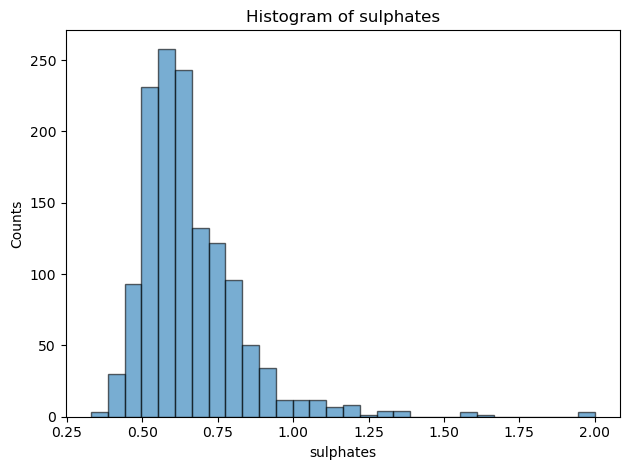

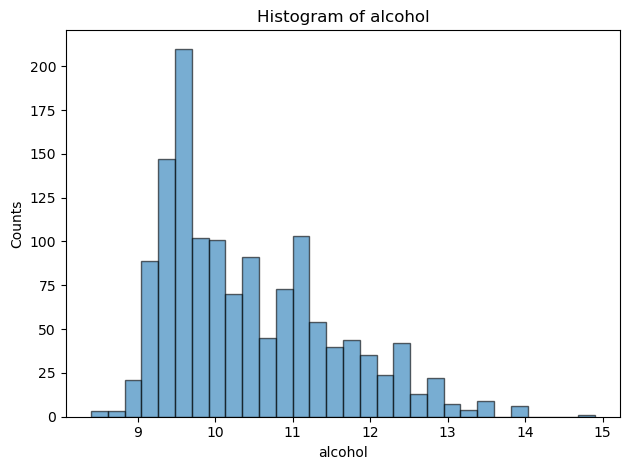

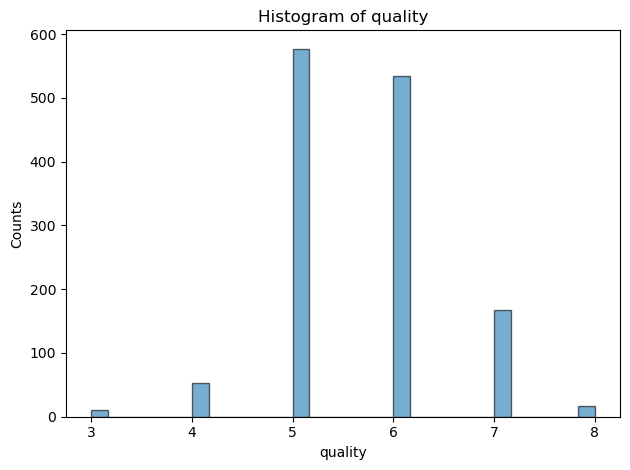

In [62]:
#4. Plot the histograms of each variable (e.g., column) and check whether any of those contain outliers (by
#inspecting visually or using standard deviation (3) rule). 
for col in win_cleaned.columns:
        plt.hist(win_cleaned[col], bins=30, edgecolor='black', alpha=0.6)
        plt.xlabel(col)
        plt.ylabel("Counts")
        plt.title(f"Histogram of {col}")
        plt.tight_layout()
        plt.show()

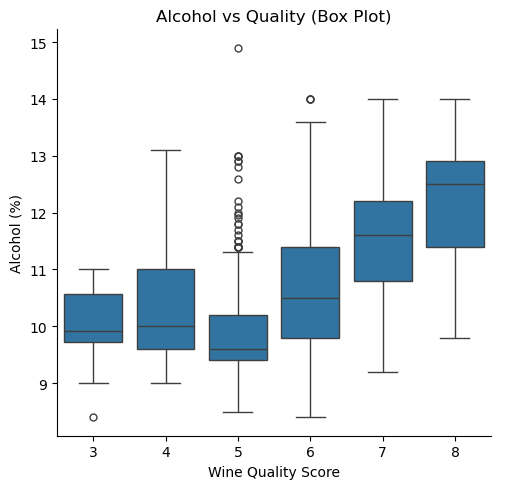

In [65]:
#5.Using seaborn library, show the catplot (e.g., side by side box plot) between Quality and Alcohol
#variable and analyze your result. 
sns.catplot(
    data=win_cleaned,
    x="quality",
    y="alcohol",
    kind="box"
)

plt.xlabel("Wine Quality Score")
plt.ylabel("Alcohol (%)")
plt.title("Alcohol vs Quality (Box Plot)")
plt.tight_layout()
plt.show()

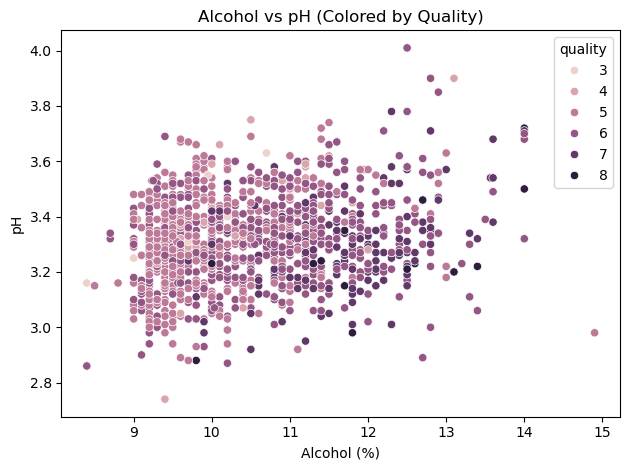

In [67]:
#6. Show a scatter plot between “Alcohol” and ‘pH” column where each data point will be represented
#by a color based on their “Quality”. 
sns.scatterplot(
    data=win_cleaned,
    x="alcohol",
    y="pH",
    hue="quality"
)

plt.xlabel("Alcohol (%)")
plt.ylabel("pH")
plt.title("Alcohol vs pH (Colored by Quality)")
plt.tight_layout()
plt.show()

In [69]:
#===========================
#Question 4- iris.csv
#===========================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
iris = pd.read_csv("iris.csv")
iris.groupby("species").head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica


In [73]:
#1 Use a pandas aggregate operation to determine the mean, median, and standard deviation
#of the petal and sepal ratio for each of the three species in the data set and show the result
#as bar graph.
aggregate = iris.groupby("species").agg(["mean", "median", "std"])
print(aggregate)

           sepal_length                  sepal_width                   \
                   mean median       std        mean median       std   
species                                                                 
setosa            5.006    5.0  0.352490       3.418    3.4  0.381024   
versicolor        5.936    5.9  0.516171       2.770    2.8  0.313798   
virginica         6.588    6.5  0.635880       2.974    3.0  0.322497   

           petal_length                  petal_width                   
                   mean median       std        mean median       std  
species                                                                
setosa            1.464   1.50  0.173511       0.244    0.2  0.107210  
versicolor        4.260   4.35  0.469911       1.326    1.3  0.197753  
virginica         5.552   5.55  0.551895       2.026    2.0  0.274650  


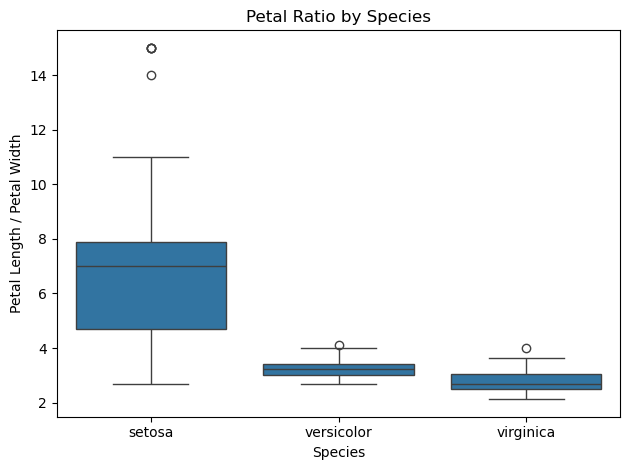

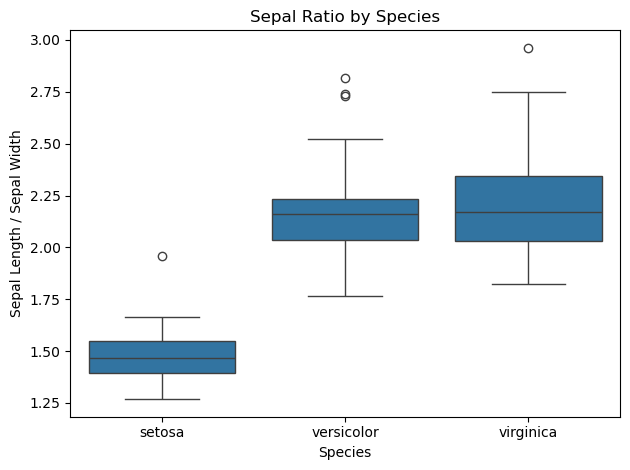

In [77]:
#2. Make a box-and-whisker plot showing the distribution of petal ratio and sepal ratio for
#each of the three species. Also include labels on your x- and y-axes and give an appropriate
#title to your plot. 

#our y axis will be the ratio  of both petal and sepal
iris["petal_ratio"] = iris["petal_length"] / iris["petal_width"]
iris["sepal_ratio"] = iris["sepal_length"] / iris["sepal_width"]

# petal ratio by species
sns.boxplot(data=iris, x="species", y="petal_ratio")
plt.xlabel("Species")
plt.ylabel("Petal Length / Petal Width")
plt.title("Petal Ratio by Species")
plt.tight_layout()
plt.show()

# --- sepal_ratio by species ---
sns.boxplot(data=iris, x="species", y="sepal_ratio")
plt.xlabel("Species")
plt.ylabel("Sepal Length / Sepal Width")
plt.title("Sepal Ratio by Species")
plt.tight_layout()
plt.show()

Sepal length vs sepal width r: -0.10936924995064937
Petal length vs petal width r: 0.9627570970509663


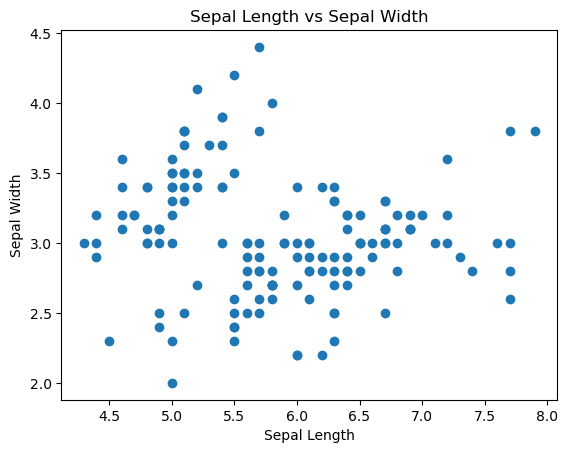

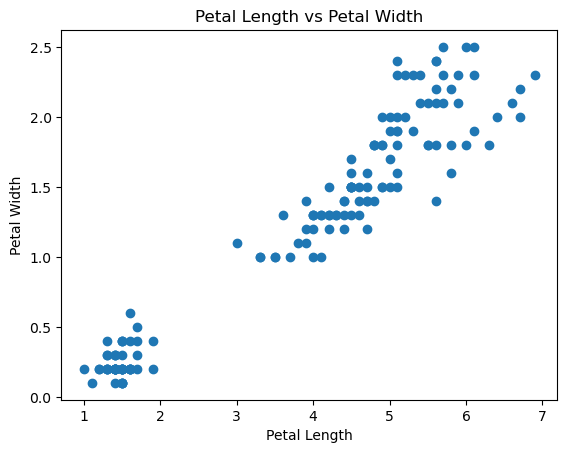

In [87]:
#3. What kind of correlation exists in these variables? Describe your result based on the
#value of r and shape of the scatter plot. 

# Pearson r
r_sepal = iris["sepal_length"].corr(iris["sepal_width"])
r_petal = iris["petal_length"].corr(iris["petal_width"])

print("Sepal length vs sepal width r:", r_sepal)
print("Petal length vs petal width r:", r_petal)

#sepal
plt.scatter(iris["sepal_length"], iris["sepal_width"])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Sepal Width")
plt.show()

# = petal
plt.scatter(iris["petal_length"], iris["petal_width"])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Petal Length vs Petal Width")
plt.show()


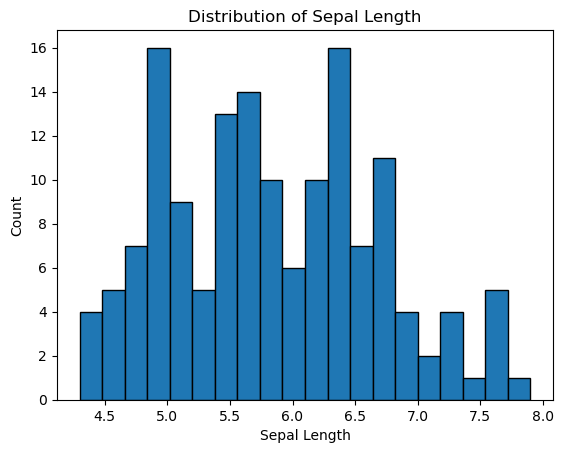

In [88]:
#4. Generate histograms for the ‘sepal.length’ column. What can you interpret from the
#generated histogram? 
plt.hist(iris["sepal_length"], bins=20, edgecolor="black")
plt.xlabel("Sepal Length")
plt.ylabel("Count")
plt.title("Distribution of Sepal Length")
plt.show()

In [91]:
#5.Show the range of values (low and high) which covers the 68% and 95% of the area of
#data points of ‘sepal.length’ column. 
mue = iris["sepal_length"].mean()
sigma = iris["sepal_length"].std()

low68 = mue - sigma
high68 = mue + sigma

low95 = mue - 2*sigma
high95 = mue + 2*sigma

print("68% range (approx):", low68, "to", high68)
print("95% range (approx):", low95, "to", high95)

68% range (approx): 5.015267205355471 to 6.671399461311196
95% range (approx): 4.187201077377608 to 7.499465589289059


           sepal_length           sepal_width          
                   mean       std        mean       std
species                                                
setosa            5.006  0.352490       3.418  0.381024
versicolor        5.936  0.516171       2.770  0.313798
virginica         6.588  0.635880       2.974  0.322497


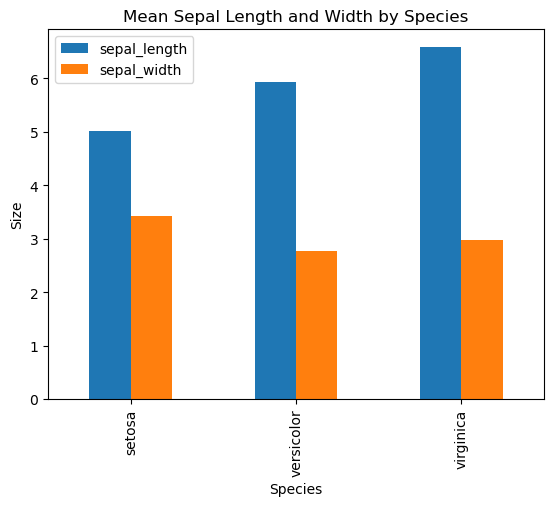

In [97]:
#6 Find the mean and standard deviation of sepal.length and sepal.width for each flower
#type and show the result as bar graphs.
sepal_length_width = iris.groupby("species")[["sepal_length", "sepal_width"]].agg(["mean", "std"])
print(sepal_length_width)

meanSepal = iris.groupby("species")[["sepal_length", "sepal_width"]].mean()

meanSepal.plot(kind="bar")
plt.title("Mean Sepal Length and Width by Species")
plt.xlabel("Species")
plt.ylabel("Size")
plt.legend()
plt.show()
